IMPORT LIBRARY

In [ ]:
# 1. Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# DATA SELECTION (READ DATASET)

In [ ]:
# 2. Baca dataset covid_19.csv
df = pd.read_csv('covid_19.csv')
df.head()

,country,continent,population,day,time,Cases,Recovered,Deaths,Tests
0,Saint-Helena,Africa,6115.0,2024-06-30,2024-06-30T16:15:16+00:00,2166,2.0,NaN,NaN
1,Falkland-Islands,South-America,3539.0,2024-06-30,2024-06-30T16:15:16+00:00,1930,1930.0,NaN,8632.0
2,Montserrat,North-America,4965.0,2024-06-30,2024-06-30T16:15:16+00:00,1403,1376.0,8.0,17762.0
3,Diamond-Princess,NaN,NaN,2024-06-30,2024-06-30T16:15:16+00:00,712,699.0,13.0,NaN
4,Vatican-City,Europe,799.0,2024-06-30,2024-06-30T16:15:16+00:00,29,29.0,NaN,NaN


# DATA PRE PROCESSING

In [ ]:
# 3. Cek info data dan missing value
df.info()
print("======================")
print("Jumlah Duplikat Data: ", df.duplicated().sum())
print("======================")
print("Jumlah Missing Value: ")
print(df.isna().sum())
print("======================")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     238 non-null    object 
 1   continent   236 non-null    object 
 2   population  229 non-null    float64
 3   day         238 non-null    object 
 4   time        238 non-null    object 
 5   Cases       238 non-null    int64  
 6   Recovered   190 non-null    float64
 7   Deaths      233 non-null    float64
 8   Tests       213 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 16.9+ KB
Jumlah Duplikat Data:  0
Jumlah Missing Value: 
country        0
continent      2
population     9
day            0
time           0
Cases          0
Recovered     48
Deaths         5
Tests         25
dtype: int64


,population,Cases,Recovered,Deaths,Tests
count,2.290000e+02,2.380000e+02,1.900000e+02,2.330000e+02,2.130000e+02
mean,3.469404e+07,8.883449e+06,1.006214e+07,9.026621e+04,3.298829e+07
std,1.386374e+08,5.193031e+07,5.555519e+07,5.163434e+05,1.198779e+08
min,7.990000e+02,9.000000e+00,2.000000e+00,1.000000e+00,7.850000e+03
25%,4.454310e+05,2.741875e+04,2.197250e+04,2.250000e+02,3.478150e+05
50%,5.797805e+06,2.320425e+05,2.351455e+05,2.570000e+03,2.226216e+06
75%,2.210284e+07,1.565481e+06,2.078212e+06,1.805700e+04,1.346373e+07
max,1.448471e+09,7.047539e+08,6.756198e+08,7.010681e+06,1.186852e+09


In [ ]:
# 4. Hapus baris yang memiliki missing value pada fitur yang akan digunakan
fitur = ['Cases', 'Recovered', 'Deaths', 'Tests', 'population']
df = df.dropna(subset=fitur)

In [ ]:
# Hapus outlier
for f in fitur:
    upper_limit = df[f].quantile(0.95)
    df = df[df[f] <= upper_limit]

CREATE SCATTER PLOT


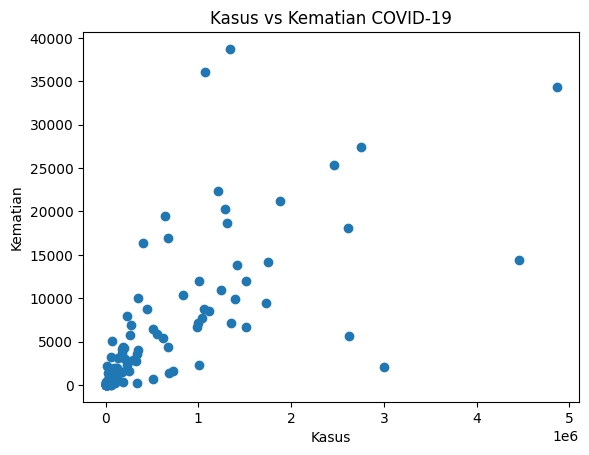

In [ ]:
# 5. Scatter plot sederhana (misal: Cases vs Deaths)
plt.scatter(df['Cases'], df['Deaths'])
plt.xlabel('Kasus')
plt.ylabel('Kematian')
plt.title('Kasus vs Kematian COVID-19')
plt.show()

# TRANSFORM DATASET (TRAINING DATASET)

In [ ]:
# 6. Membuat data training (fitur yang digunakan untuk clustering)
x_train = df[fitur].values
x_train

array([[1.4030000e+03, 1.3760000e+03, 8.0000000e+00, 1.7762000e+04,
        4.9650000e+03],
       [3.4520000e+03, 2.4490000e+03, 2.0000000e+00, 2.5400000e+04,
        5.7590000e+03],
       [1.5690000e+04, 1.5427000e+04, 1.8900000e+02, 3.0594100e+05,
        1.0160970e+06],
       [1.1971000e+04, 2.7610000e+03, 2.1000000e+01, 1.6492600e+05,
        5.6973000e+04],
       [1.0189000e+04, 1.0086000e+04, 1.0300000e+02, 2.3693000e+04,
        3.6622440e+06],
       [9.9310000e+03, 8.8900000e+03, 3.1200000e+02, 2.5453800e+05,
        2.6083660e+07],
       [1.7229000e+04, 1.6907000e+04, 1.8300000e+02, 3.6569700e+05,
        1.4966620e+06],
       [8.0900000e+03, 7.7830000e+03, 2.9500000e+02, 1.3982400e+05,
        5.3051170e+06],
       [5.3930000e+03, 5.3470000e+03, 1.0000000e+00, 2.0509000e+04,
        1.0903000e+04],
       [1.1682000e+04, 1.0476000e+04, 3.8000000e+01, 3.0126000e+04,
        2.6647000e+04],
       [1.8860000e+04, 1.8685000e+04, 1.6500000e+02, 1.0295580e+06,
        6.19

In [ ]:
# 7. Feature scaling agar skala fitur sama
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

# DATA MINING (KLUSTERING DENGAN K MEANS)




In [ ]:
# 8. Clustering dengan KMeans (misal: 4 cluster)
kmean = KMeans(n_clusters=4, random_state=42, n_init=10)
y_cluster = kmean.fit_predict(x_train)
y_cluster

array([3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 0, 2, 2, 3, 0, 0, 0, 3, 2, 0,
       0, 3, 3, 3, 0, 2, 3, 3, 3, 0, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
# 9. Tambahkan label cluster ke dataframe
df['Cluster'] = y_cluster
df

,country,continent,population,day,time,Cases,Recovered,Deaths,Tests,Cluster
2,Montserrat,North-America,4965.0,2024-06-30,2024-06-30T16:15:16+00:00,1403,1376.0,8.0,17762.0,3
9,Saint-Pierre-Miquelon,North-America,5759.0,2024-06-30,2024-06-30T16:15:16+00:00,3452,2449.0,2.0,25400.0,3
14,Djibouti,Africa,1016097.0,2024-06-30,2024-06-30T16:15:15+00:00,15690,15427.0,189.0,305941.0,3
15,Greenland,North-America,56973.0,2024-06-30,2024-06-30T16:15:15+00:00,11971,2761.0,21.0,164926.0,3
16,Eritrea,Africa,3662244.0,2024-06-30,2024-06-30T16:15:15+00:00,10189,10086.0,103.0,23693.0,3
...,...,...,...,...,...,...,...,...,...,...
203,Croatia,Europe,4059286.0,2024-06-30,2024-06-30T16:15:11+00:00,1309728,1258432.0,18687.0,5660084.0,0
204,Guatemala,North-America,18584039.0,2024-06-30,2024-06-30T16:15:11+00:00,1291293,1269891.0,20289.0,7593848.0,0
206,Lebanon,Asia,6684849.0,2024-06-30,2024-06-30T16:15:11+00:00,1243838,1087587.0,10952.0,4795578.0,0
208,Bolivia,South-America,11992656.0,2024-06-30,2024-06-30T16:15:11+00:00,1212131,1177145.0,22407.0,2710261.0,0


In [ ]:
# 10. Lihat posisi centroid
print("Centroid (dalam skala hasil normalisasi):")
print(kmean.cluster_centers_)

Centroid (dalam skala hasil normalisasi):
[[0.26578728 0.26275904 0.36975317 0.22636606 0.15157017]
 [0.690878   0.69166021 0.52341687 0.61646571 0.26376064]
 [0.04573123 0.04343218 0.10747413 0.05717529 0.59262989]
 [0.02616326 0.02533349 0.03138824 0.03204545 0.0651762 ]]


# EVALUASI (VISUALISASI K MEANS)

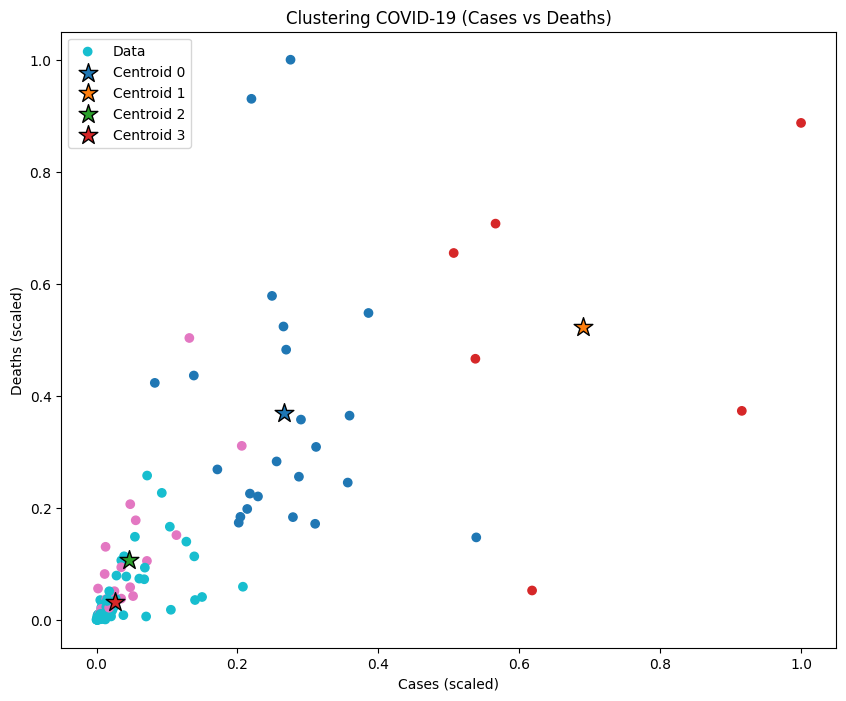

In [ ]:
# 11. Visualisasi hasil clustering (menggunakan dua fitur utama, misal: Cases dan Deaths)
plt.figure(figsize=(10, 8))
plt.scatter(x_train[:, 0], x_train[:, 2], c=kmean.labels_, cmap='tab10', label='Data')
for i, center in enumerate(kmean.cluster_centers_):
    plt.scatter(center[0], center[2], marker='*', s=200, edgecolor='black', label=f'Centroid {i}')
plt.xlabel('Cases (scaled)')
plt.ylabel('Deaths (scaled)')
plt.title('Clustering COVID-19 (Cases vs Deaths)')
plt.legend()
plt.show()

In [ ]:
# 12. Menentukan nilai K terbaik dengan metode Elbow
inertia = []
k_range = range(1, 10)
for i in k_range:
    km = KMeans(n_clusters=i, random_state=42, n_init=10)
    km.fit(x_train)
    inertia.append(km.inertia_)

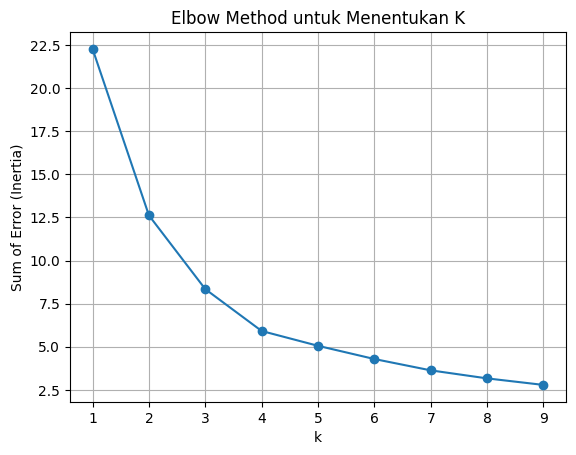

In [ ]:
plt.xlabel("k")
plt.ylabel("Sum of Error (Inertia)")
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method untuk Menentukan K')
plt.grid()
plt.show()

In [ ]:
# Ganti label cluster dengan keterangan tingkat dampak COVID-19
df['Cluster'] = df['Cluster'].replace(
    [0, 1, 2, 3],
    ['Dampak Rendah', 'Dampak Sedang', 'Dampak Tinggi', 'Dampak Sangat Tinggi']
)
df

,country,continent,population,day,time,Cases,Recovered,Deaths,Tests,Cluster
2,Montserrat,North-America,4965.0,2024-06-30,2024-06-30T16:15:16+00:00,1403,1376.0,8.0,17762.0,Dampak Sangat Tinggi
9,Saint-Pierre-Miquelon,North-America,5759.0,2024-06-30,2024-06-30T16:15:16+00:00,3452,2449.0,2.0,25400.0,Dampak Sangat Tinggi
14,Djibouti,Africa,1016097.0,2024-06-30,2024-06-30T16:15:15+00:00,15690,15427.0,189.0,305941.0,Dampak Sangat Tinggi
15,Greenland,North-America,56973.0,2024-06-30,2024-06-30T16:15:15+00:00,11971,2761.0,21.0,164926.0,Dampak Sangat Tinggi
16,Eritrea,Africa,3662244.0,2024-06-30,2024-06-30T16:15:15+00:00,10189,10086.0,103.0,23693.0,Dampak Sangat Tinggi
...,...,...,...,...,...,...,...,...,...,...
203,Croatia,Europe,4059286.0,2024-06-30,2024-06-30T16:15:11+00:00,1309728,1258432.0,18687.0,5660084.0,Dampak Rendah
204,Guatemala,North-America,18584039.0,2024-06-30,2024-06-30T16:15:11+00:00,1291293,1269891.0,20289.0,7593848.0,Dampak Rendah
206,Lebanon,Asia,6684849.0,2024-06-30,2024-06-30T16:15:11+00:00,1243838,1087587.0,10952.0,4795578.0,Dampak Rendah
208,Bolivia,South-America,11992656.0,2024-06-30,2024-06-30T16:15:11+00:00,1212131,1177145.0,22407.0,2710261.0,Dampak Rendah
